In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 2s 0us/step


In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [5]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
BATCH_SIZE = 100 
IMG_SHAPE  = 150 

In [7]:
train_image_generator      = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-12-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 20s 437ms/step - loss: 0.7453 - accuracy: 0.4990 - val_loss: 0.6909 - val_accuracy: 0.5880
Epoch 2/100
20/20 [==============================] - 9s 434ms/step - loss: 0.6828 - accuracy: 0.5770 - val_loss: 0.6490 - val_accuracy: 0.6150
Epoch 3/100
20/20 [==============================] - 8s 426ms/step - loss: 0.6545 - accuracy: 0.6005 - val_loss: 0.6417 - val_accuracy: 0.6290
Epoch 4/100
20/20 [==============================] - 9s 431ms/step - loss: 0.6163 - accuracy: 0.6520 - val_loss: 0.6145 - val_accuracy: 0.6600
Epoch 5/100
20/20 [==============================] - 9s 428ms/step - loss: 0.5826 - accuracy: 0.6870 - val_loss: 0.5915 - val_accuracy: 0.6920
Epoch 6/100
20/20 [==============================] - 8s 425ms/step - loss: 0.5393 - accuracy: 0.7195 - val_loss: 0.5751 - val_accuracy: 0.6970
Epoch 7/100
20/20 [==============================] - 8s 422ms/step - loss: 0.4960 - accuracy: 0.7575 - val_loss: 0.5671 - val_accuracy: 0.727

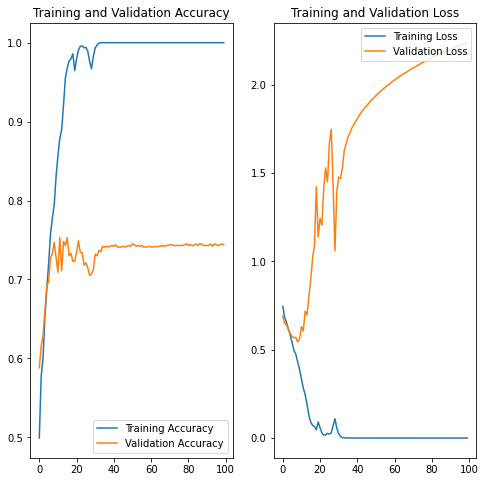

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

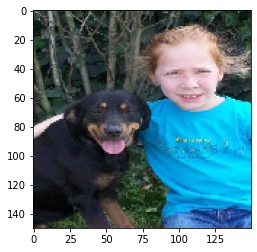

1/1 [==============================] - 0s 15ms/step
[[ 4.905163 -4.045645]]
there is cat


In [34]:
sample_training_images, _ = next(val_data_gen) 
imgplot = plt.imshow(sample_training_images[0])
plt.show()
img = sample_training_images[0]
img = np.array([img])
prediction = model.predict(img)
print(prediction)
if prediction[0][0] > 0:
  print('there is cat')
if prediction[0][1] > 0:
  print('there is dog')

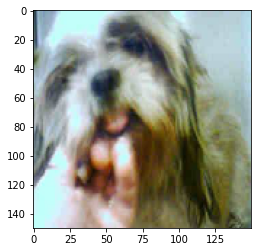

1/1 [==============================] - 0s 16ms/step
[[-8.506328  8.638942]]
there is dog


In [36]:
imgplot = plt.imshow(sample_training_images[1])
plt.show()
img = sample_training_images[1]
img = np.array([img])
prediction = model.predict(img)
print(prediction)
if prediction[0][0] > 0:
  print('there is cat')
if prediction[0][1] > 0:
  print('there is dog')

In [35]:
print(prediction)


[[ 4.905163 -4.045645]]
